In [ ]:
#################################### A2C Agent #####################################

In [26]:
import gym
from a2c import A2CAgent 
import time

# Create Gym environment
env = gym.make("CartPole-v1")

# Check agent class for initialization parameters and initialize agent
gamma = 0.9
lr = 1e-3

agent = A2CAgent(env, gamma, lr)

# Define training parameters
max_episodes = 500
max_steps = 500

episode_rewards = []
run_time = []
start_time = time.time()
for episode in range(max_episodes):
    trajectory = []
    state = env.reset()
    episode_reward = 0
    for step in range(max_steps):
        action = agent.get_action(state)
        next_state, reward, done, _ = env.step(action)
        trajectory.append((state, action, reward, next_state, done))
        episode_reward += reward  
        if done or step == max_steps:
            episode_rewards.append(episode_reward)
            print("Episode " + str(episode) + ": " + str(episode_reward))
            break
        state = next_state
    agent.update(trajectory, 0)
    elapse = time.time() - start_time
    run_time.append(elapse)
    
a2c_rewards = episode_rewards
a2c_runtime = run_time

Episode 0: 53.0
Episode 1: 32.0
Episode 2: 30.0
Episode 3: 53.0
Episode 4: 63.0
Episode 5: 30.0
Episode 6: 43.0
Episode 7: 55.0
Episode 8: 51.0
Episode 9: 18.0
Episode 10: 94.0
Episode 11: 67.0
Episode 12: 30.0
Episode 13: 46.0
Episode 14: 24.0
Episode 15: 18.0
Episode 16: 42.0
Episode 17: 56.0
Episode 18: 49.0
Episode 19: 62.0
Episode 20: 28.0
Episode 21: 43.0
Episode 22: 85.0
Episode 23: 39.0
Episode 24: 35.0
Episode 25: 88.0
Episode 26: 51.0
Episode 27: 76.0
Episode 28: 40.0
Episode 29: 35.0
Episode 30: 101.0
Episode 31: 67.0
Episode 32: 23.0
Episode 33: 60.0
Episode 34: 145.0
Episode 35: 46.0
Episode 36: 124.0
Episode 37: 37.0
Episode 38: 134.0
Episode 39: 55.0
Episode 40: 60.0
Episode 41: 79.0
Episode 42: 34.0
Episode 43: 39.0
Episode 44: 33.0
Episode 45: 37.0
Episode 46: 95.0
Episode 47: 66.0
Episode 48: 69.0
Episode 49: 60.0
Episode 50: 82.0
Episode 51: 57.0
Episode 52: 41.0
Episode 53: 95.0
Episode 54: 41.0
Episode 55: 83.0
Episode 56: 69.0
Episode 57: 57.0
Episode 58: 32.0
Epi

Episode 446: 158.0
Episode 447: 212.0
Episode 448: 182.0
Episode 449: 152.0
Episode 450: 163.0
Episode 451: 102.0
Episode 452: 218.0
Episode 453: 270.0
Episode 454: 192.0
Episode 455: 238.0
Episode 456: 295.0
Episode 457: 131.0
Episode 458: 177.0
Episode 459: 250.0
Episode 460: 163.0
Episode 461: 205.0
Episode 462: 227.0
Episode 463: 174.0
Episode 464: 196.0
Episode 465: 152.0
Episode 466: 227.0
Episode 467: 206.0
Episode 468: 196.0
Episode 469: 172.0
Episode 470: 194.0
Episode 471: 285.0
Episode 472: 136.0
Episode 473: 178.0
Episode 474: 218.0
Episode 475: 197.0
Episode 476: 144.0
Episode 477: 110.0
Episode 478: 269.0
Episode 479: 108.0
Episode 480: 154.0
Episode 481: 142.0
Episode 482: 126.0
Episode 483: 122.0
Episode 484: 215.0
Episode 485: 193.0
Episode 486: 205.0
Episode 487: 137.0
Episode 488: 119.0
Episode 489: 167.0
Episode 490: 144.0
Episode 491: 103.0
Episode 492: 110.0
Episode 493: 190.0
Episode 494: 146.0
Episode 495: 210.0
Episode 496: 160.0
Episode 497: 144.0
Episode 498:

In [ ]:
##################################### DR TRPO Agent (KL) #####################################

In [32]:
import gym
from a2c_dr_trpo import DRTRPOAgent1  

# Create Gym environment
env = gym.make("CartPole-v1")

# Check agent class for initialization parameters and initialize agent
gamma = 0.9
lr = 1e-3

agent = DRTRPOAgent1(env, gamma, lr)


############################### MC Updates  (Full Episode) ###############################

# Define training parameters
max_episodes = 500
max_steps = 500

episode_rewards = []
run_time = []
start_time = time.time()
for episode in range(max_episodes):
    first_state = env.reset()
    state_adv = []
    total_value_loss = 0
    
    episode_reward = 0
    # loop through the first action
    for i in range(env.action_space.n):
        env.reset()
        state = first_state
        action = i
        trajectory = []
        
        for step in range(max_steps):
            if step != 0:
                action = agent.get_action(state)
            next_state, reward, done, _ = env.step(action)
            trajectory.append((state, action, reward, next_state, done))
            episode_reward += reward  
            if done or step == max_steps-1:
                break
            state = next_state
            
        adv, value_loss = agent.compute_adv_first_sa(trajectory)
        state_adv.append(adv)
        total_value_loss += value_loss
        
    policy_loss = agent.compute_policy_loss(state, state_adv)
    agent.update(value_loss, policy_loss)
    elapse = time.time() - start_time
    run_time.append(elapse)
    
    episode_rewards.append(episode_reward/env.action_space.n)
    print("Episode " + str(episode) + ": " + str(episode_reward))

dr_trpo_rewards = episode_rewards
dr_trpo_runtime = run_time

Episode 0: 25.0
Episode 1: 41.0
Episode 2: 25.0
Episode 3: 43.0
Episode 4: 37.0
Episode 5: 24.0
Episode 6: 47.0
Episode 7: 43.0
Episode 8: 33.0
Episode 9: 61.0
Episode 10: 68.0
Episode 11: 47.0
Episode 12: 57.0
Episode 13: 53.0
Episode 14: 77.0
Episode 15: 33.0
Episode 16: 78.0
Episode 17: 35.0
Episode 18: 47.0
Episode 19: 35.0
Episode 20: 42.0
Episode 21: 57.0
Episode 22: 36.0
Episode 23: 24.0
Episode 24: 40.0
Episode 25: 97.0
Episode 26: 59.0
Episode 27: 38.0
Episode 28: 25.0
Episode 29: 30.0
Episode 30: 49.0
Episode 31: 61.0
Episode 32: 28.0
Episode 33: 96.0
Episode 34: 56.0
Episode 35: 37.0
Episode 36: 40.0
Episode 37: 42.0
Episode 38: 52.0
Episode 39: 64.0
Episode 40: 71.0
Episode 41: 75.0
Episode 42: 32.0
Episode 43: 69.0
Episode 44: 54.0
Episode 45: 48.0
Episode 46: 97.0
Episode 47: 36.0
Episode 48: 86.0
Episode 49: 54.0
Episode 50: 37.0
Episode 51: 70.0
Episode 52: 62.0
Episode 53: 49.0
Episode 54: 65.0
Episode 55: 132.0
Episode 56: 202.0
Episode 57: 76.0
Episode 58: 58.0
Episo

Episode 451: 233.0
Episode 452: 69.0
Episode 453: 122.0
Episode 454: 67.0
Episode 455: 222.0
Episode 456: 67.0
Episode 457: 406.0
Episode 458: 276.0
Episode 459: 182.0
Episode 460: 118.0
Episode 461: 232.0
Episode 462: 109.0
Episode 463: 207.0
Episode 464: 384.0
Episode 465: 214.0
Episode 466: 129.0
Episode 467: 115.0
Episode 468: 165.0
Episode 469: 140.0
Episode 470: 103.0
Episode 471: 169.0
Episode 472: 129.0
Episode 473: 171.0
Episode 474: 279.0
Episode 475: 325.0
Episode 476: 138.0
Episode 477: 337.0
Episode 478: 169.0
Episode 479: 215.0
Episode 480: 195.0
Episode 481: 188.0
Episode 482: 98.0
Episode 483: 322.0
Episode 484: 241.0
Episode 485: 310.0
Episode 486: 116.0
Episode 487: 193.0
Episode 488: 168.0
Episode 489: 295.0
Episode 490: 165.0
Episode 491: 167.0
Episode 492: 83.0
Episode 493: 172.0
Episode 494: 316.0
Episode 495: 232.0
Episode 496: 325.0
Episode 497: 212.0
Episode 498: 123.0
Episode 499: 292.0


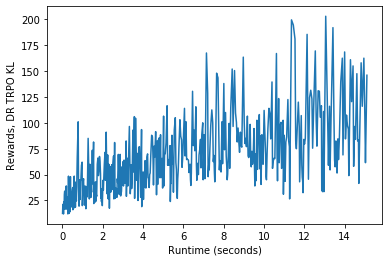

In [34]:
import matplotlib.pyplot as plt

plt.plot(dr_trpo_runtime, dr_trpo_rewards)
plt.ylabel('Rewards, DR TRPO KL')
plt.xlabel('Runtime (seconds)')
plt.show()

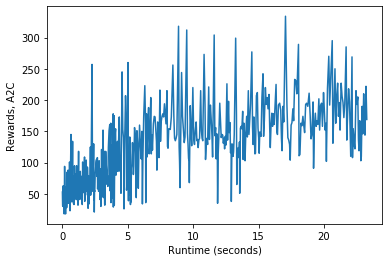

In [31]:
import matplotlib.pyplot as plt

plt.plot(a2c_runtime, a2c_rewards)
plt.ylabel('Rewards, A2C')
plt.xlabel('Runtime (seconds)')
plt.show()